<a href="https://colab.research.google.com/github/utkuyucel/Deep-Learning/blob/master/ResNet_like_model_~_Very_low_accuracy_(_about_60_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Conv2D,DepthwiseConv2D, MaxPooling2D, Flatten, Activation, Input, Dense, ZeroPadding2D, AveragePooling2D, BatchNormalization, Add, concatenate,Dropout
from keras.models import Model, load_model
from keras.utils import to_categorical, plot_model, layer_utils
from matplotlib.pyplot import imshow
from keras.datasets import cifar10
from tensorboardcolab import *
import keras
import matplotlib.pyplot as plt
import keras.backend as K

#K.set_image_data_format("channels_last")
#K.set_learning_phase(1)

Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255.
X_test /= 255.

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

170500096/170498071 [==============================] - 41s 0us/step


In [0]:
def res(X_input, F1):
  
  X = Conv2D(F1, (1,1), strides = (1,1), padding = "same")(X_input)
  X = BatchNormalization()(X)
  X = Activation("relu")(X)
  
  X = Conv2D(F1, (3,3), strides = (1,1), padding = "same")(X)
  X = BatchNormalization()(X)
  X = Activation("relu")(X)
  
  X = Conv2D(F1, (1,1), strides = (1,1), padding = "same")(X)
  X = BatchNormalization()(X)
  
  Y = Conv2D(F1, (1,1), strides = (1,1), padding = "same")(X_input)
  
  X = Add()([X, Y])
  X = Activation("relu")(X)
  
  
  return X
  
  

In [0]:
def model(X_input = (32,32,3)):
  
  X_input = Input(X_input)
  
  X = res(X_input, 64)
  X = res(X, 128)
  X = res(X,256)
  X = res(X,128)
  
  
  X = Flatten()(X)
  X = Dense(10, activation = "softmax")(X)
  
  model = Model(inputs = X_input, outputs = X)
  
  return model

In [0]:
model = model((32,32,3))


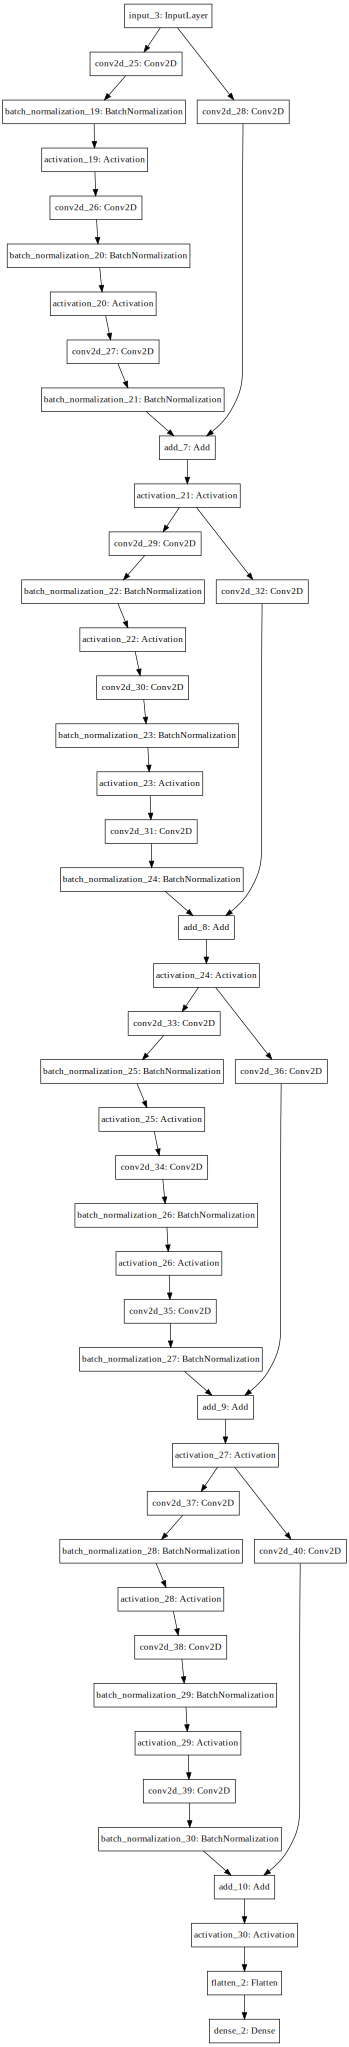

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [0]:
model.load_weights("model.h5")

In [0]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [18]:
#tbc = TensorBoardColab()
history = model.fit(X_train, y_train, epochs = 10, batch_size = 50,validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 117s 2ms/step - loss: 0.1167 - acc: 0.9591 - val_loss: 2.6061 - val_acc: 0.5852
Epoch 2/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.0812 - acc: 0.9727 - val_loss: 2.7853 - val_acc: 0.5878
Epoch 3/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.0797 - acc: 0.9726 - val_loss: 3.0122 - val_acc: 0.5726
Epoch 4/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.0682 - acc: 0.9770 - val_loss: 2.9617 - val_acc: 0.5843
Epoch 5/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.0663 - acc: 0.9788 - val_loss: 3.1337 - val_acc: 0.5828
Epoch 6/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.0567 - acc: 0.9809 - val_loss: 3.2141 - val_acc: 0.5794
Epoch 7/10
50000/50000 [==============================] - 115s 2ms/step - loss: 0.0601 - acc: 0.9804 - val_loss: 3.2697 - 

In [0]:
model.save_weights("model.h5")

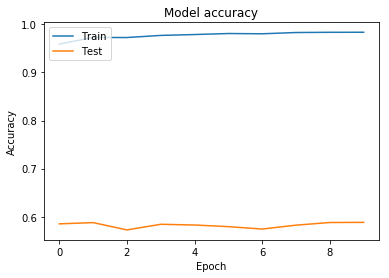

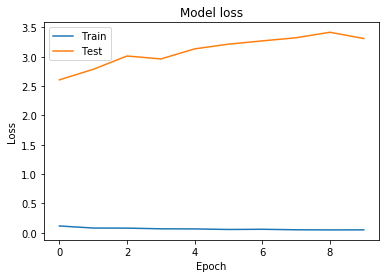

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()